In [ ]:
# Creating a dataset with two features (e.g., age and income). 100 data points.
import numpy as np
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, 100),  # Random ages between 18 and 70
    'Income': np.random.randint(20000, 100000, 100)  # Random incomes between 20,000 and 100,000
}

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


df = pd.DataFrame(data)

# Step 2: Normalize the data
# Use MinMaxScaler to normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=['Age', 'Income'])

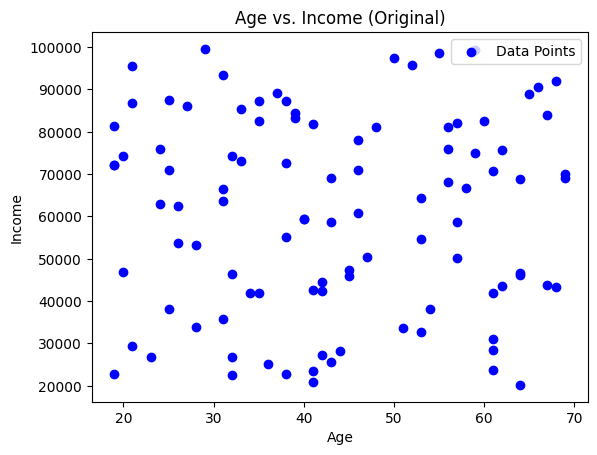

In [ ]:
# Step 3: Visualize the original dataset
# Scatter plot to show the data points
plt.scatter(df['Age'], df['Income'], c='blue', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income (Original)')
plt.legend()
plt.show()

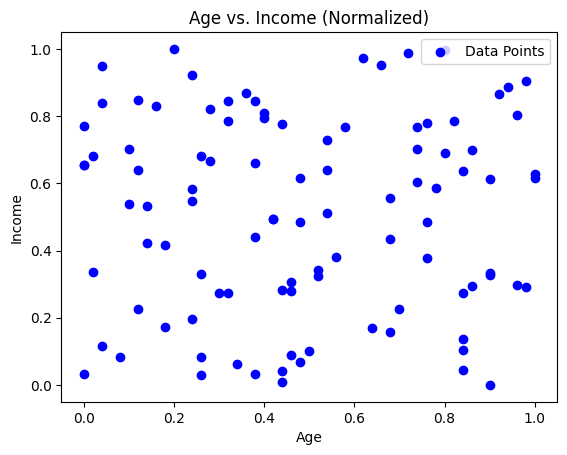

In [ ]:
# Step 3: Visualize the normalized dataset
# Scatter plot to show the data points
plt.scatter(normalized_df['Age'], normalized_df['Income'], c='blue', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income (Normalized)')
plt.legend()
plt.show()

In [ ]:
# Step 4: Apply KMeans clustering with different numbers of clusters
# Initializing lists to store results for evaluation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_values = [2, 3, 4]
silhouette_scores = []

# Iterate through different k values to evaluate the clustering
for k in k_values:
    # Initialize the KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the normalized data
    kmeans.fit(normalized_df)

    # Predict cluster labels
    cluster_labels = kmeans.labels_

    # Calculate the Silhouette score
    score = silhouette_score(normalized_df, cluster_labels)
    silhouette_scores.append(score)

    print(f"For k = {k}, Silhouette Score = {score:.2f}")


For k = 2, Silhouette Score = 0.33
For k = 3, Silhouette Score = 0.40
For k = 4, Silhouette Score = 0.43


In [ ]:
# Step 5: Select the best k based on Silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"\nThe best number of clusters is k = {best_k} with a Silhouette Score of {max(silhouette_scores):.2f}.")


The best number of clusters is k = 4 with a Silhouette Score of 0.43.


In [ ]:
# Step 6: Apply KMeans with the best k and analyze the clusters
# Initialize the KMeans model with the best k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(normalized_df)
cluster_labels = kmeans_best.labels_
cluster_labels

array([2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 1, 0, 0, 3, 3, 1, 1, 3, 0, 3,
       2, 1, 3, 2, 1, 1, 0, 3, 2, 3, 2, 3, 1, 3, 0, 0, 2, 2, 1, 0, 2, 1,
       1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 3, 1, 3, 2, 1, 0, 3, 0, 2, 3, 3, 2,
       0, 0, 1, 1, 3, 2, 3, 2, 3, 3, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 3, 2,
       1, 1, 0, 1, 0, 3, 3, 3, 2, 2, 2, 3], dtype=int32)

In [ ]:
# Add the cluster labels to the original DataFrame for the dataset
df['Cluster'] = cluster_labels

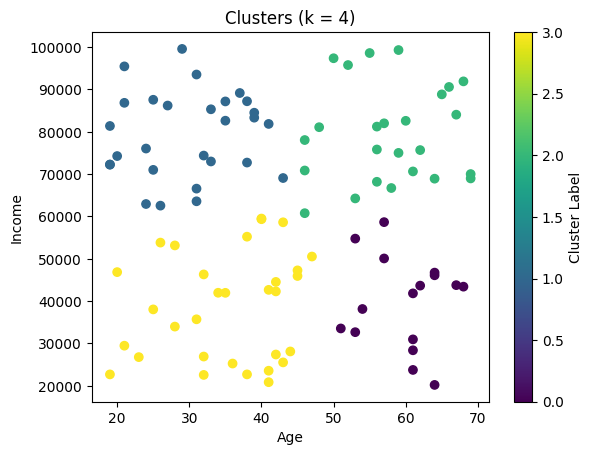

In [ ]:
# Visualize the clusters
plt.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis', label='Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f'Clusters (k = {best_k})')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Step 7: Analyze the clusters for insights
# Group by the clusters and calculate the mean of features for each cluster
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis (Average Age and Income for each cluster):")
print(cluster_analysis)


Cluster Analysis (Average Age and Income for each cluster):
               Age        Income
Cluster                         
0        59.875000  39793.937500
1        29.821429  79371.142857
2        57.920000  79491.120000
3        35.290323  38696.322581
